In [7]:
import torch
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from random import choice
from IPython.display import display
from scipy.ndimage.filters import gaussian_filter
from torchvision.transforms import ToTensor
import math

# Images
img_path = "datasets/combined/images/train/haze-097_jpg.rf.e1e5f1c1ff6ee1733f461b37cccff19c.jpg"
imgs = Image.open(img_path)
confidence_threshold = 0.1
iou_threshold = 0.1

C:\Users\nussb\AppData\Local\Temp\ipykernel_8788\2310997946.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [9]:
dip = torch.load("DIP_Model_Best.pth", map_location='cpu')
dip.eval()

imgs = Image.open(img_path)
img_tensor = ToTensor()(imgs).unsqueeze(0)

out = (dip(img_tensor).detach().squeeze().permute((1, 2, 0)).numpy())
out = (out-out.min())/(1.15*(out.max()-out.min()))
dip_image = Image.fromarray((out*255).astype(np.uint8))

AttributeError: 'tuple' object has no attribute 'squeeze'

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = confidence_threshold  # confidence threshold (0-1)
model.iou = iou_threshold

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

Using cache found in C:\Users\nussb/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-28 Python-3.10.10 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 640x640 1 car
Speed: 2.1ms pre-process, 5.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs\detect\exp56


,xmin,ymin,xmax,ymax,confidence,class,name
0,337.960876,572.393738,378.234253,620.431702,0.588381,2,car


In [ ]:
img = ImageDraw.Draw(imgs)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink']
for row in results.pandas().xyxy[0].iterrows():
    img.rectangle([row[1]['xmin'], row[1]['ymin'], row[1]['xmax'], row[1]['ymax']], outline=choice(colors), width=5)

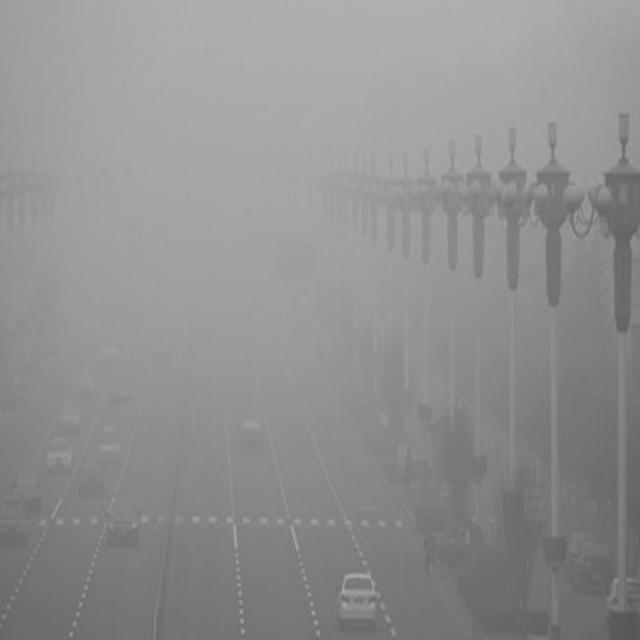

In [ ]:
display(imgs)
imgs.save("foggy_road.jpg")

In [ ]:
from yolov5.models.yolo import Model

#model = Model(cfg='yolov5/models/yolov5s.yaml')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = confidence_threshold  # confidence threshold (0-1)
model.iou = iou_threshold

# Inference
in_tensor = ToTensor()(dip_image).unsqueeze(0)
results = model(dip_image)

# Results
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person

Using cache found in C:\Users\nussb/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-28 Python-3.10.10 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to runs\detect\exp58


,xmin,ymin,xmax,ymax,confidence,class,name
0,336.831116,573.152283,380.657959,627.849915,0.732216,2,car
1,423.106323,534.678467,436.998291,575.848145,0.217562,0,person


In [ ]:
dip_image_copy = dip_image.copy()
img = ImageDraw.Draw(dip_image_copy)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink']
for row in results.pandas().xyxy[0].iterrows():
    print()
    img.rectangle([row[1]['xmin'], row[1]['ymin'], row[1]['xmax'], row[1]['ymax']], outline=choice(colors), width=5)


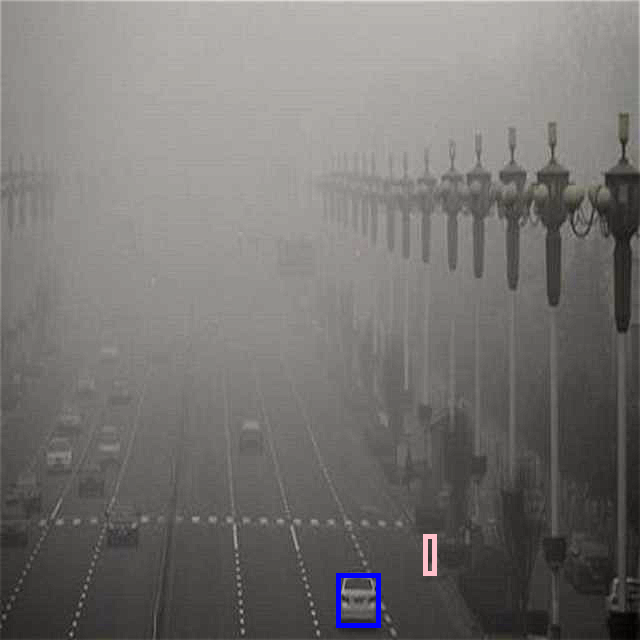

In [ ]:
display(dip_image_copy)
dip_image_copy.save("foggy_road_dip_old.png")

In [ ]:
from yolov5.utils.general import non_max_suppression
import pandas as pd

#model = Model(cfg='yolov5/models/yolov5s.yaml')
model = torch.load('best.pt')['model'].float()

# Inference
in_tensor = ToTensor()(dip_image).unsqueeze(0)
results, _ = model(in_tensor)
results = non_max_suppression(results, conf_thres=confidence_threshold, iou_thres=iou_threshold)[0]
pd.DataFrame(results, columns=['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class'])

,xmin,ymin,xmax,ymax,confidence,class
0,45.444416,435.736938,73.342232,470.605652,0.949314,2.0
1,336.059052,572.821411,383.484833,629.078003,0.934863,2.0
2,0.422858,493.733093,27.966694,543.152283,0.914319,2.0
3,106.085312,497.664062,138.014450,543.940063,0.904277,2.0
4,571.251526,535.926819,610.042664,589.118103,0.890695,2.0
5,57.732929,401.413605,79.317093,426.314911,0.883252,2.0
6,97.498207,426.437805,120.570290,457.382141,0.859484,2.0
7,78.416862,456.909546,100.588631,492.556458,0.842067,2.0
8,238.449631,425.088684,262.829315,454.853943,0.826693,2.0
9,13.407980,463.387360,39.418144,502.492035,0.790790,2.0


In [ ]:
img = ImageDraw.Draw(dip_image)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink']
for row in results:
    img.rectangle([row[0], row[1], row[2], row[3]], outline=choice(colors), width=5)

NameError: name 'dip_image' is not defined

In [ ]:
display(img)
#dip_image.save("foggy_road_dip_new.png")

NameError: name 'img' is not defined